In [1]:
#Biopython Installation
pip install biopython

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.7 MB 9.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.7 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------  2.7/2.7 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 17.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Check Installation
import Bio
print(Bio.__version__)

1.83


In [5]:
#Biopython package에 있는 SeqIO(Seq Input Ouput) 불러오기
from Bio import SeqIO

fasta_file = "test.fasta"
sequences = SeqIO.parse(fasta_file, "fasta")
#Biopython의 SeqIO.parse() 를 사용하여 FASTA 파일을 읽음

print(sequences)

for sequence in sequences:
    print(sequence)


ID: test
Name: test
Description: test
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAC')


In [9]:
from Bio import SeqIO

sequences = SeqIO.parse("test2.fasta","fasta")

for sequence in sequences:
    print(sequence.id)
    print(sequence.seq)
    print("---------")

test1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
---------
test2
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC
---------


{'A': 70, 'T': 84, 'G': 60, 'C': 66}
  base  count
0    A     70
1    T     84
2    G     60
3    C     66


<Axes: title={'center': 'base count'}, xlabel='base', ylabel='Count'>

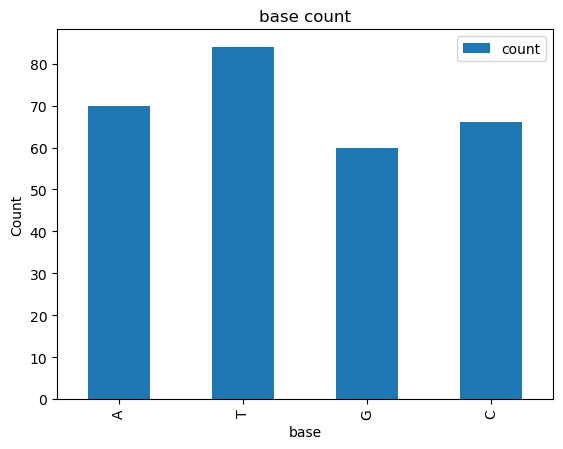

In [22]:
from Bio import SeqIO

data = dict()
sequences = SeqIO.parse("test2.fasta", "fasta")

for sequence in sequences:
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        
        data[base] += 1

print(data)

import pandas as pd
df = pd.DataFrame({"base":data.keys(), "count":data.values()})
print(df)

df.plot(kind="bar", x="base", y="count", title="base count", ylabel="Count")

{'base': dict_keys(['A', 'T', 'G', 'C'])}
0 {'A': 41, 'T': 44, 'G': 22, 'C': 33}
1 {'T': 40, 'A': 29, 'C': 33, 'G': 38}


<Axes: title={'center': 'Base count'}, xlabel='base', ylabel='Count'>

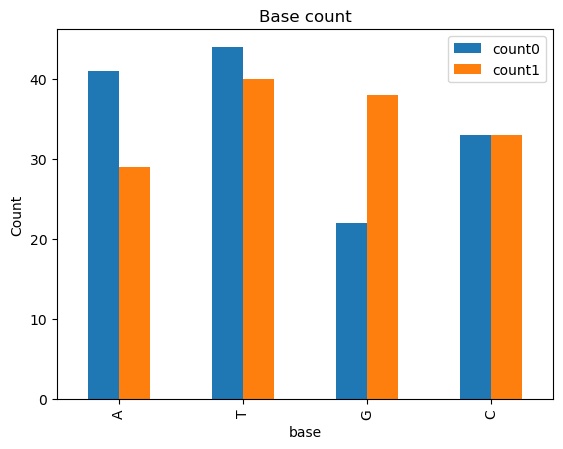

In [16]:
from Bio import SeqIO

data_all= list()
sequences = SeqIO.parse("test2.fasta", "fasta")

for sequence in sequences:
    data = dict()
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        
        data[base] += 1
    data_all.append(data)
#print(data_all)


import pandas as pd
df_data = {"base":data_all[0].keys()}
print(df_data)
for i, data in enumerate(data_all):
    print(i,data)
    df_data[f"count{i}"] = [data["A"], data["T"], data["G"], data["C"]]

df=pd.DataFrame(df_data)
df.plot(kind="bar", x="base", title="Base count", ylabel="Count")

{'base': dict_keys(['A', 'T', 'G', 'C'])}
0 {'A': 41, 'T': 44, 'G': 22, 'C': 33}
1 {'T': 40, 'A': 29, 'C': 33, 'G': 38}
2 {'C': 33, 'T': 37, 'G': 38, 'A': 32}


<Axes: title={'center': 'Base count'}, xlabel='base', ylabel='Count'>

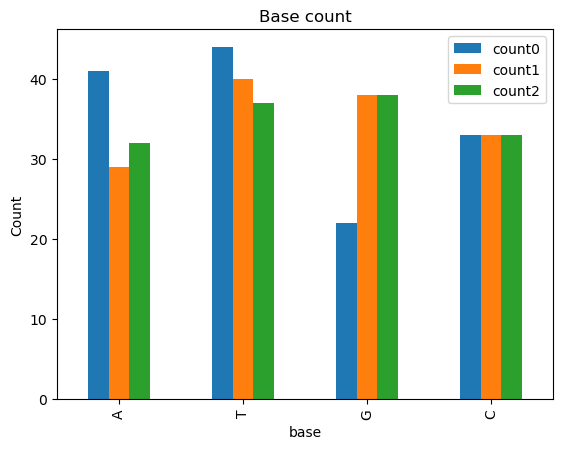

In [17]:
from Bio import SeqIO

data_all= list()
sequences = SeqIO.parse("test3.fasta", "fasta")

for sequence in sequences:
    data = dict()
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        
        data[base] += 1
    data_all.append(data)
#print(data_all)


import pandas as pd
df_data = {"base":data_all[0].keys()}
print(df_data)
for i, data in enumerate(data_all):
    print(i,data)
    df_data[f"count{i}"] = [data["A"], data["T"], data["G"], data["C"]]

df=pd.DataFrame(df_data)
df.plot(kind="bar", x="base", title="Base count", ylabel="Count")

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}
  base  count
0    A   8954
1    T   9594
2    G   5863
3    C   5492


<Axes: title={'center': 'covid-19 base count'}, xlabel='base', ylabel='count'>

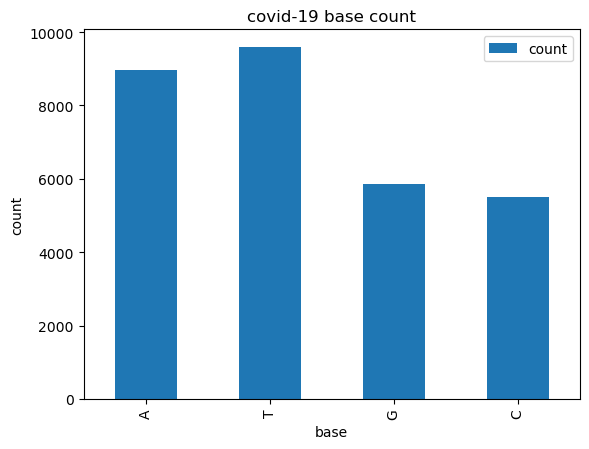

In [23]:
#genebank 서열 biopython으로 읽기(parsing)

data = dict()

from Bio import SeqIO
sequences = SeqIO.parse("NC_045512.gb", "genbank")  #fasta 읽는거랑 이 line만 다름
for sequence in sequences:
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] += 1
print(data)

import pandas as pd
df = pd.DataFrame({"base": data.keys(), "count": data.values()})
print(df)
df.plot(kind = "bar", x = "base", y = "count", ylabel = "count", title = "covid-19 base count")